# Polynimial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:\Machine Learning\Task\WorldPopulation.csv')
df.head()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [3]:
df.tail()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
65,1955,2773019936,1.77,48173195,19,877008842,32
66,1954,2724846741,1.76,47237781,18,850179106,31
67,1953,2677608960,1.78,46747398,18,824289989,31
68,1952,2630861562,1.81,46827301,18,799282533,30
69,1951,2584034261,1.88,47603112,17,775067697,30


In [4]:
df.describe()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
count,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000
mean,1985.500000,5.002010e+09,1.616429,7.511954e+07,33.557143,2.226815e+09,42.200000
std,20.351085,1.594877e+09,0.321288,1.256972e+07,10.723989,1.070191e+09,7.447595
min,1951.000000,2.584034e+09,1.050000,4.674740e+07,17.000000,7.750677e+08,30.000000
25%,1968.250000,3.570120e+09,1.262500,7.314225e+07,24.000000,1.294408e+09,36.000000
50%,1985.500000,4.915745e+09,1.770000,7.942852e+07,33.000000,2.035272e+09,41.500000
75%,2002.750000,6.361332e+09,1.847500,8.356683e+07,42.750000,3.054260e+09,48.000000
max,2020.000000,7.794799e+09,2.090000,9.290386e+07,52.000000,4.378994e+09,56.000000


In [5]:
df.isnull().sum()

Year          0
Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        70 non-null     int64  
 1   Population  70 non-null     int64  
 2   ChangePerc  70 non-null     float64
 3   NetChange   70 non-null     int64  
 4   Density     70 non-null     int64  
 5   Urban       70 non-null     int64  
 6   UrbanPerc   70 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 4.0 KB


In [7]:
x = df.iloc[:,:1].values
y = df.iloc[:,4:5].values

In [8]:
y.shape

(70, 1)

In [9]:
x.shape

(70, 1)

### train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 99)
print('X_train Shape -',x_train.shape)
print('X_test Shape -',x_test.shape)
print('Y_train Shape -',y_train.shape)
print('Y_test Shape -',y_test.shape)

X_train Shape - (56, 1)
X_test Shape - (14, 1)
Y_train Shape - (56, 1)
Y_test Shape - (14, 1)


### Importing Linear Algo

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr1 = LinearRegression()

In [14]:
lr1.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = lr1.predict(x_test)
y_pred

array([[30.21587588],
       [49.56822648],
       [46.43000746],
       [33.8771314 ],
       [48.52215347],
       [28.64676637],
       [20.27818233],
       [47.99911697],
       [35.96927741],
       [22.37032834],
       [43.29178845],
       [24.98551085],
       [27.60069336],
       [44.33786145]])

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test,y_pred)*100

99.66560782561619

### Visualization

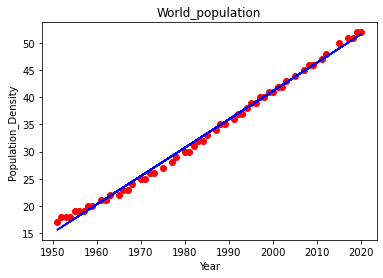

In [18]:
# For Train Data
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,lr1.predict(x_train),color = 'blue')
plt.title('World_population')
plt.xlabel('Year')
plt.ylabel('Population_Density')
plt.show()

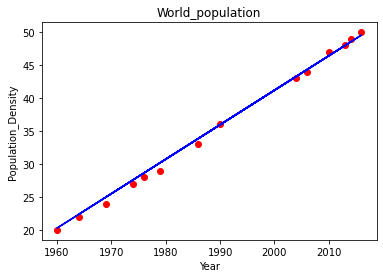

In [19]:
# For test data
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,y_pred,color = 'blue')
plt.title('World_population')
plt.xlabel('Year')
plt.ylabel('Population_Density')
plt.show()

In [20]:
lr1.predict([[2015]])

array([[49.04518998]])

In [21]:
df.head(7)

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54
5,2015,7379797139,1.16,84506374,50,3981497663,54
6,2014,7295290765,1.17,84708789,49,3902831934,53


In [22]:
# Import Polynimial Regression for best fit line..
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=11)

In [23]:
x_poly = pf.fit_transform(x)

In [24]:
lr2 = LinearRegression()

In [25]:
lr2.fit(x_poly,y)

LinearRegression()

In [26]:
y_pred1 = lr2.predict(x_poly)

### Again Visualising

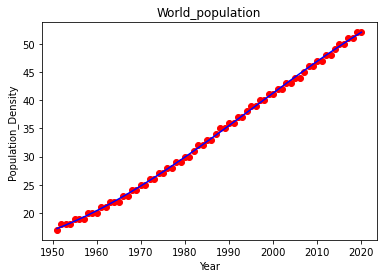

In [27]:
plt.scatter(x,y,color = 'red')
plt.plot(x,y_pred1,color= 'blue')
plt.title('World_population')
plt.xlabel('Year')
plt.ylabel('Population_Density')
plt.show()

In [28]:
print('Linear Regression:- ',r2_score(y_test,y_pred)*100)

Linear Regression:-  99.66560782561619


In [29]:
print('Polynomial Regression:- ',r2_score(y,y_pred1)*100)

Polynomial Regression:-  99.91279380819431
